# **Case: detecção de número (dataset MNIST)**

#### **Importando as bibliotecas necessárias**

In [1]:
import sklearn
import numpy as np
# para ignorar os avisos de mensagens das funções
import warnings
warnings.filterwarnings("ignore")

# pacote para trabalhar com data frame (tabelas)
import pandas as pd
# pacote mais básico para vizualização gráfica
import matplotlib.pyplot as plt
# um dos pacotes para fazer gráficos
import seaborn as sns
# sklearn - pacote análise de dados
# existe grande parte dos métodos mais famosos
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# função para fazer avaliação dos modelos
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense, Dropout

#### **Modelo Extreme Machine Learning (ELM)**

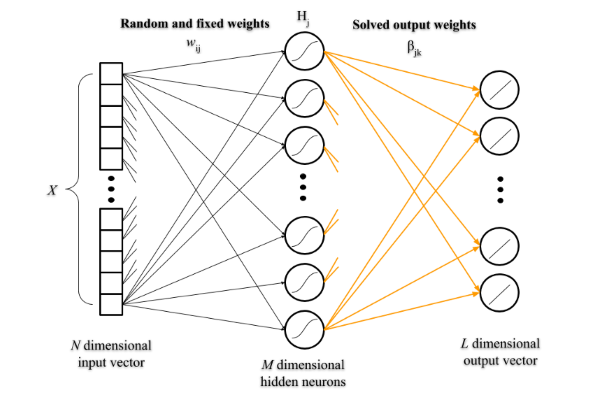

* <u>Extreme Machine Learning (ELM)</u> são redes neurais com somente uma camada oculta (hidden layer), e um número finito de neurônios. Esse redere neural não realiza ajuste iterativa, por isso possui um desempenho melhor que os modelos de rede neurais com retroporogramação.

* <u>Cálculo da saída do ELM</u>:
$$f_{L}(x) = \sum_{i = 1}^{L} \beta_i g_i(x) = \sum_{i = 1}^{L} \beta_i g(w_i * x_j + b_i), j = 1, \dots, N,$$
onde
  * $L$ é uma série de unidades ocultas;
  * $N$ é uma série de exemplos de treinamento;
  * $\beta_{(L,m)}$ é o vetor de peso entre a camada oculta e a saída;
  * $w_{(N,L)}$ é uma matrizr de pesos entre a camada de entrada e a camada oculta;
  * $g$ é uma função de ativação;
  * $b_{(N,L)}$ é um vetor de viés (bias);
  * $x_{(L,N)}$ em um vetor de entrada.

$$\begin{align}
f_{L}(x) = \sum_{i = 1}^{L} \beta_i g_i(x) &= \sum_{i = 1}^{L} \beta_i g(w_i * x_j + b_i), j = i, \dots, N,\\
&= \begin{bmatrix}
\beta_1 g(w_1 * x_1 + b_1) & \dots & \beta_1 g(w_L * x_1 + b_L)\\ 
\vdots & \dots & \vdots \\ 
\beta_L g(w_1* x_N + b_1) & \dots & \beta_L g(w_L * x_N + b_L)
\end{bmatrix}\\
&= \begin{bmatrix}
g(w_1 * x_1 + b_1) & \dots & g(w_L * x_1 + b_L)\\ 
\vdots & \dots & \vdots \\ 
g(w_1* x_N + b_1) & \dots & g(w_L * x_N + b_L)
\end{bmatrix} . \begin{bmatrix}
\beta_1^{T}\\ 
\vdots\\ 
\beta_L^{T}
\end{bmatrix} = H_{(N,L)} \beta_{(L,m)}\\
&= \begin{bmatrix}
t_1^{T}\\ 
\vdots\\ 
t_N^{T}
\end{bmatrix} = T_{(N,m)}
\end{align}$$
$\hspace{1.8cm} \Rightarrow H_{(N,L)} \beta_{(L,m)} = T_{(N,m)} \Rightarrow H_{(L,N)}^{-1} H_{(N,L)} \beta_{(L,m)} = H_{(L,N)}^{-1} T_{(N,m)} \Rightarrow I_{(L,L)} \beta_{(L,m)} = H_{(L,N)}^{-1} T_{(N,m)}$

$\hspace{1.8cm} \Rightarrow \beta_{(L,m)} = H_{(L,N)}^{-1} T_{(N,m)},$

onde
  * $m$ é o número de saídas;
  * $H_{(N,L)}$ é a matriz de saída da camada oculta;
  * $T_{(N,m)}$ é a matriz de treinamento da variável reposta ($y$ ou rótulo ou label).

* <u>Algoritmo</u>:
  1. Atribua aleatoriamente os pesos $w_i$ e os viés (bias) $b_i, i = 1, \dots, L$;
  2. Calcule a saída das camadas ocultas $H$;
  3. Calcule a matriz de pesos de saída $\hat{\beta} = H^{+} T$;
  4. Use $\hat{\beta}$ para fazer a predição de novos dados $T = H \hat{\beta}$.


[Fonte](https://towardsdatascience.com/introduction-to-extreme-learning-machines-c020020ff82b)

#### **Explicação da base de dados**

* **Base de dados**: é um banco dados de dígitos manuscritos comumente usado para treinar vários sistemas de processamento de imagem.
* **Objetivo**: reconhecimento de imagens, neste caso números.
* **Técnica usada**: rede neural Extreme Learning Machine (ELM).

#### **Importando os dados**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estagio_TAO_Python/Datasets/train_MNIST.csv', sep = ",")
print('tamanho dados: {}'.format(dados.shape))

tamanho dados: (42000, 785)


#### **Vizualizando graficamente alguns labels**



In [4]:
X = dados.iloc[:, 1:].values.astype('float32')
labels = dados.iloc[:, 0].values.astype('int32')

In [5]:
print(X.shape)
print(labels.shape)

(42000, 784)
(42000,)


Nesta base de dados temos 4200 fotos de números.

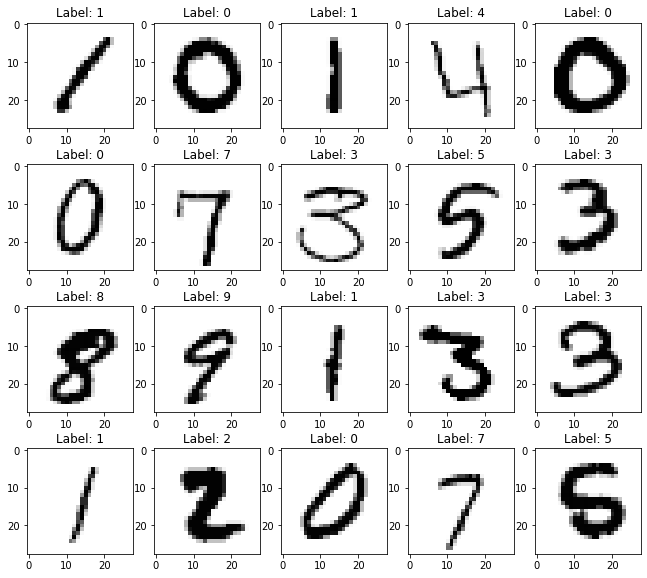

In [6]:
fig = plt.figure(figsize = (11, 10))
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.title('Label: {label}'.format(label = labels[i]))
    plt.imshow(X[i].reshape(28, 28), cmap = 'Greys')

Pelos gráficos das imagens, averiguamos que as fotos dos números compreeende números escritos de forma manuscrita e não fotos criadas no computador.

**Transformando a variável rsposta ($y$) de 0 a 9 para binária**

Nesta passo transformamos a variável resposta ($y$), em variável binária com uma coluna para cada classe, sendo que em cada coluna temos um para o valor da classe e zero para as demais classes.

In [7]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
onehotencoder = OneHotEncoder(categories = 'auto')
scaler = MinMaxScaler()
X = scaler.fit_transform(dados.drop(['label'], axis = 1))
y = onehotencoder.fit_transform(pd.DataFrame(dados.label)).toarray()

#### **Dados de treinamento e teste.**

Separamos os dados em dados de treinamento e dados de teste, sendo 30% para teste. Para em seguida aplicar na rede neural ELM.


In [8]:
from sklearn.model_selection import train_test_split

# labels = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print('Train size: {train}, Test size: {test}'.format(train = X_train.shape, test = X_test.shape))

Train size: (29400, 784), Test size: (12600, 784)


### **Aplicando o algoritmo do Extreme Learning Machine apresentado acima.**

Agora aplicamos a rede neural ELM usando o algoritmo apresentado no começo do estudo.

**Passo 1.** Atribua aleatoriamente os pesos $w_i$ e os viés (bias) $b_i, i = 1, \dots, L$;

Usamos cada oculta única com $1000$ neurônios.

In [9]:
L = 1000
N = X_train.shape[1]
# b_vies = np.random.normal(size = [X_train.shape[0], L])
w = np.random.normal(size = [N, L])
print('L: {}.'.format(L))
print('N: {}.'.format(N))
print('Tamanho vetor de pesos (w): {}.'.format(w.shape))

L: 1000.
N: 784.
Tamanho vetor de pesos (w): (784, 1000).


**Passo 2.** Calcule a saída das camadas ocultas $H$;

Definimos a função 'activation_function' com as funções de ativação que iremos usar nos estudos. As funções de ativação que temos na função são
* Linear;
* Threshold;
* Sigmoide;
* TanH;
* ReLU;
* Leaky ReLU;
* ELU;
* Softmax.

Criando as funções de ativação.
[Fonte 1](https://matheusfacure.github.io/2017/07/12/activ-func/) / [Fonte 2](http://www2.decom.ufop.br/imobilis/redes-neurais-funcoes-de-ativacao/)

In [10]:
def activation_function(x, name = 'TanH', alpha = 1):
  ''' Implementação das funções de ativação '''
  import math
  if name == 'Linear':
    return x
  elif name == 'Threshold':
    ''' Função De Ativação Com Limite (Threshold) '''
    k = x.copy()
    for i in range(0, k.shape[0]):
      for j in range(0, k.shape[1]):
        if k[i, j] >= 0.5:
          k[i, j] = 1
        else:
          k[i, j] = 0
    return k
  elif name == 'Sigmoide':
    return 1 / (1 + np.exp(np.dot(-1, x)))
  elif name == 'TanH':
    ''' Tangente Hiperbólica (TanH) '''
    sigma = 1 / (1 + np.exp(np.dot(-2, x)))
    return 2 * sigma - 1
  elif name == 'ReLU':
    ''' Rectified Linear Unit (ReLU) '''
    return np.maximum(0, x)
  elif name == 'Leaky ReLU':
    return np.maximum(np.dot(alpha, x), x)
  elif name == 'ELU':
    k = x.copy()
    for i in range(0, k.shape[0]):
      for j in range(0, k.shape[1]):
        if k[i, j] >= 0:
          pass
        else:
          k[i, j] = alpha * (np.exp(k[i, j]) - 1)
    return k
  elif name == 'Softmax':
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

Primeiramente treinamenos os dados no modelo ELM com função de ativação ReLU. Mais para frente, refazemos a análise aplicando as outras funções de ativação para saber se com as outras funções de ativação a acurácia aumenta.

$H_{(N,L)} = \begin{bmatrix}
g(w_1 * x_1 + b_1) & \dots & g(w_L * x_1 + b_L)\\ 
\vdots & \dots & \vdots \\ 
g(w_1* x_N + b_1) & \dots & g(w_L * x_N + b_L)
\end{bmatrix}$

In [11]:
def matriz_saida(df, w, name_act = 'TanH'):
  b = np.random.normal(size = [df.shape[0], L]) # b = pd.DataFrame(b_vies).iloc[0:len(df),:]
  Xw = np.dot(df, w) + b
  H = activation_function(Xw, name = name_act) # for k in Xw]
  return H

H = matriz_saida(X_train, w, name_act = 'ReLU')

**Passo 3.** Calcule a matriz de pesos de saída $\hat{\beta} = H^{+} T$;

$$\begin{align}
H\beta &= T\\
\Rightarrow H^{T} H\beta &= H^{T} T\\
\Rightarrow \beta &= (H^{T} H)^{-1} H^{T} T\\
\end{align}$$

Multiplicando ambos os lados da equação por $H^{T}$ para transformar a matriz $H$ em quadrado e conseguir aplicar a inversa, porque só podemos fazer a inversa de matrizes quadradas.

In [12]:
T = y_train
def pred(T, H):
  HtH = np.dot(H.T, H)
  HtT = np.dot(H.T, T)
  beta = np.dot(np.linalg.inv(HtH), HtT)
  return beta
beta = pred(T, H)
print('Tamanho beta: {}.'.format(beta.shape))

Tamanho beta: (1000, 10).


**Passo 4.** Use $\hat{\beta}$ para fazer a predição de novos dados $T = H \hat{\beta}$.

Com $\hat{\beta}$ obtido, fazemos a predição de novos dados. Neste problema, representa a predição da classe das novas fotos de números.

In [13]:
H = matriz_saida(X_test, w, 'ReLU')
y_pred = np.dot(H, beta)

**Acurácia do modelo ELM**

Após a predição de novos dados da base de treino, que são ds 30% dos dados que separamos, verificamos a acurácia obtida pelo modelo ELM.

In [14]:
print('Tamanho y_test: {}'.format(y_test.shape))
print('Tamanho y_pred: {}'.format(y_pred.shape))

Tamanho y_test: (12600, 10)
Tamanho y_pred: (12600, 10)


In [15]:
def acuracia_model(y_test, y_pred):
  correct = 0
  total = y_pred.shape[0]
  for i in range(total):
      predicted = np.argmax(y_pred[i])
      test = np.argmax(y_test[i])
      correct = correct + (1 if predicted == test else 0)
  return correct/total
acuracia = acuracia_model(y_test, y_pred)
print('Accuracy: {:.4f}'.format(acuracia))

Accuracy: 0.9387


* Pelo treinamento obtemos a probabilidade de cada foto estar em uma das classes de números $\{ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 \}$, para escolher em que classe a foto está, escolhemos a classe em que a foto tem maior probabilidade. Fazemos isso tanto para os dados de teste quanto para os dados preditos e calculamos a acurácia do modelo.

* A acurácia obtida pelo modelo foi de $93.87$, o que é um bom valor.

### **Aplicando o modelo ELM usando outras funções de ativação**

Por último aplicamos o modelo ELM, aos dados MNIST, usando outras funções de ativação.

In [16]:
print('Extreme Machine Learning')
name_active = ['Linear', 'Threshold', 'Sigmoide', 'TanH', 'ReLU', 'Leaky ReLU', 'ELU', 'Softmax']
result = pd.DataFrame(np.random.rand(len(name_active), 2), columns = ["Função de Ativação", "Acurácia"])

c = 0
for i in name_active:
  H = matriz_saida(X_train, w, name_act = i)
  T = y_train
  beta = pred(T, H)
  H = matriz_saida(X_test, w, name_act = i)
  y_pred = np.dot(H, beta)
  acuracia = acuracia_model(y_test, y_pred)
  result.iloc[c, 0] = i
  result.iloc[c, 1] = acuracia
  # print('Accuracy EML com função de ativação {}: {:.4f}'.format(i, acuracia))
  c += 1

result.sort_values(['Acurácia'], ascending = False)

Extreme Machine Learning


,Função de Ativação,Acurácia
6,ELU,0.938254
4,ReLU,0.937302
2,Sigmoide,0.923254
3,TanH,0.914841
1,Threshold,0.907698
5,Leaky ReLU,0.841825
0,Linear,0.841508
7,Softmax,0.426508


Concluímos, que pelas análises que o melhor modelo ELM usando mil neurônios ($L = 1000$), é o modelo que aplica a função de ativação ELU, obtendo uma acurácia de $93.83 \%$. E o pior modelo foi usando a função de ativação Softmax, que obteve a acutrácia de $42.65 \%$, o que é um resultado bem ruim perdendo até para os modelos ingênuos como Naive Bayes.